In [104]:
import pandas as pd
import numpy as np

In [105]:
df_train = pd.read_csv('../../dataset/train/train_converted.csv')
df_test  = pd.read_csv('../../dataset/test/test_converted.csv')

In [106]:
df_train.head(2)

,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,Z_WEEK,Demanda,Z_WEEK_DATE,Z_DAY,Z_MONTH,Z_YEAR
0,MAR_5,GAM_3,MOD_318,DEP_12,PVENT_26,SEMANA_01,0,2021-05-17,17,5,2021
1,MAR_3,GAM_1,MOD_305,DEP_1,PVENT_212,SEMANA_01,0,2021-05-17,17,5,2021


In [107]:
df_test.head(2)

,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,Z_WEEK,Demanda,Z_WEEK_DATE,Z_DAY,Z_MONTH,Z_YEAR
0,MAR_5,GAM_3,MOD_318,DEP_12,PVENT_26,SEMANA_51,NaN,2022-05-02,2,5,2022
1,MAR_3,GAM_1,MOD_305,DEP_1,PVENT_212,SEMANA_51,NaN,2022-05-02,2,5,2022


In [108]:
df_train = df_train[['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA','Z_WEEK','Z_WEEK_DATE','Demanda']].groupby(['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA','Z_WEEK','Z_WEEK_DATE']).sum().reset_index()
df_test = df_test[['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA','Z_WEEK','Z_WEEK_DATE','Demanda']].groupby(['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA','Z_WEEK','Z_WEEK_DATE']).sum().reset_index()

In [109]:
df_train['Z_WEEK_DATE'] = pd.to_datetime(df_train['Z_WEEK_DATE'])
df_test['Z_WEEK_DATE'] = pd.to_datetime(df_test['Z_WEEK_DATE'])


In [110]:
def get_distance_from_paydays(date):
    end_of_month = date.daysinmonth
    distance_to_1st = 0 if date.day >=15 else 15 - date.day
    distance_to15th = 0 if date.day < 15 else end_of_month - date.day
    return distance_to_1st + distance_to15th

df_train['days_from_payday'] = df_train['Z_WEEK_DATE'].apply(get_distance_from_paydays)

In [111]:
df_test['days_from_payday'] = df_test['Z_WEEK_DATE'].apply(get_distance_from_paydays)

In [112]:
for column_name in ['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA','Z_WEEK','Z_WEEK_DATE']:
    df_train['average_sales_by_'+column_name] = df_train.groupby(["Z_WEEK_DATE", column_name], observed=True).Demanda.transform('mean')

In [113]:
df_train['dayofweek'] = df_train['Z_WEEK_DATE'].dt.dayofweek.astype('str').astype('category')
df_train['month'] = df_train['Z_WEEK_DATE'].dt.month.astype('str').astype('category')
df_train['dayofyear'] = df_train['Z_WEEK_DATE'].dt.dayofyear.astype('str').astype('category')

In [114]:
df_train

,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Z_WEEK,Z_WEEK_DATE,Demanda,days_from_payday,average_sales_by_Z_MODELO,average_sales_by_Z_PUNTO_VENTA,average_sales_by_Z_GAMA,average_sales_by_Z_WEEK,average_sales_by_Z_WEEK_DATE,dayofweek,month,dayofyear
0,MOD_1,PVENT_1,GAM_1,SEMANA_01,2021-05-17,0,14,0.000000,10.754032,1.141352,0.752613,0.752613,0,5,137
1,MOD_1,PVENT_1,GAM_1,SEMANA_02,2021-05-24,0,7,0.000000,12.705645,1.191099,0.768575,0.768575,0,5,144
2,MOD_1,PVENT_1,GAM_1,SEMANA_03,2021-05-31,0,0,0.000000,12.774194,1.193264,0.790940,0.790940,0,5,151
3,MOD_1,PVENT_1,GAM_1,SEMANA_04,2021-06-07,0,8,0.000000,13.665323,1.214385,0.813474,0.813474,0,6,158
4,MOD_1,PVENT_1,GAM_1,SEMANA_05,2021-06-14,0,1,0.000000,11.870968,1.075487,0.818243,0.818243,0,6,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358645,MOD_99,PVENT_99,GAM_3,SEMANA_46,2022-03-28,0,3,2.228216,0.172131,0.726865,0.630975,0.630975,0,3,87
2358646,MOD_99,PVENT_99,GAM_3,SEMANA_47,2022-04-04,0,11,2.116183,0.081967,0.705165,0.567846,0.567846,0,4,94
2358647,MOD_99,PVENT_99,GAM_3,SEMANA_48,2022-04-11,1,4,1.112033,0.122951,0.386478,0.353783,0.353783,0,4,101
2358648,MOD_99,PVENT_99,GAM_3,SEMANA_49,2022-04-18,1,12,3.116183,0.155738,0.764527,0.647701,0.647701,0,4,108


In [115]:
df_train.isna().sum()


Z_MODELO                          0
Z_PUNTO_VENTA                     0
Z_GAMA                            0
Z_WEEK                            0
Z_WEEK_DATE                       0
Demanda                           0
days_from_payday                  0
average_sales_by_Z_MODELO         0
average_sales_by_Z_PUNTO_VENTA    0
average_sales_by_Z_GAMA           0
average_sales_by_Z_WEEK           0
average_sales_by_Z_WEEK_DATE      0
dayofweek                         0
month                             0
dayofyear                         0
dtype: int64

In [116]:
df_train['Demanda'].value_counts()

0      1969622
1       171821
2        72705
3        38111
4        23383
        ...   
474          1
627          1
288          1
672          1
379          1
Name: Demanda, Length: 390, dtype: int64

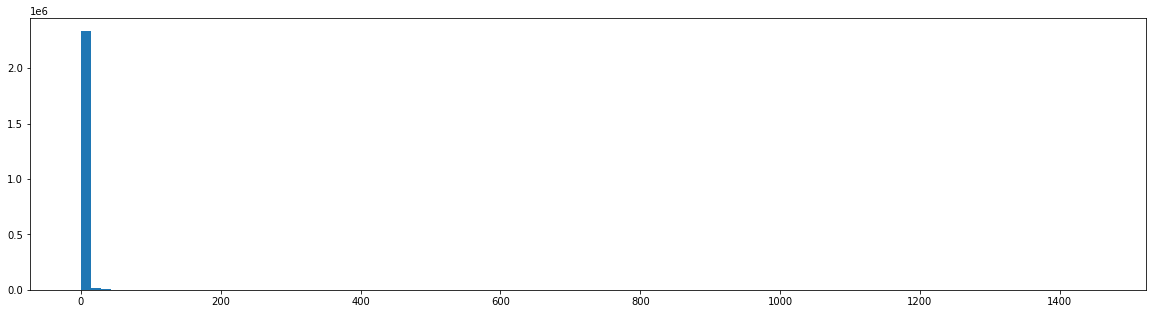

In [117]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
plt.hist(df_train['Demanda'],bins=100)
plt.show()

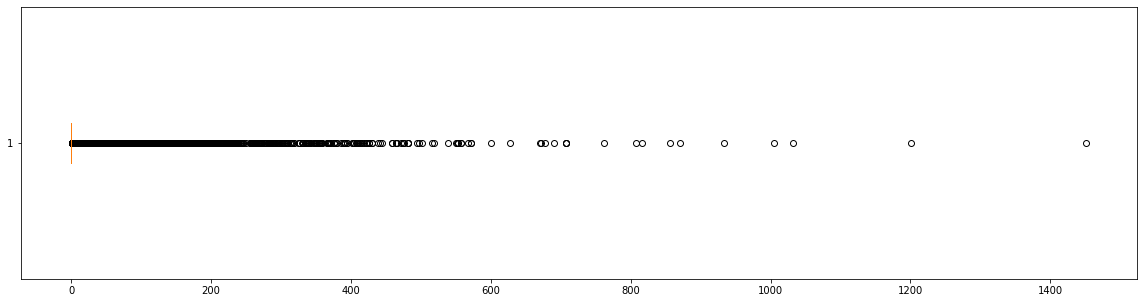

In [118]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
plt.boxplot(df_train['Demanda'],vert=False)
plt.show()

In [119]:
N_submission = df_test.shape[0]
N_sales      = df_train.shape[0]

print(df_train.shape,df_test.shape)
df_auxiliar = pd.concat([df_train,df_test])
df_auxiliar.replace([np.inf, -np.inf, np.nan],0,inplace=True)


dates = df_auxiliar['Z_WEEK'].unique()

date = df_auxiliar['Z_WEEK'].min()
maxi = df_auxiliar['Z_WEEK'].max()


dict_dates = {}
for idx,date in enumerate(dates):
    dict_dates[date] =idx
    
    
df_auxiliar['date_block_num'] = df_auxiliar['Z_WEEK'].replace(dict_dates)

df_train, df_test = df_auxiliar[:N_sales], df_auxiliar[N_sales:]
print(df_train.shape,df_test.shape)

(2358650, 15) (471730, 7)
(2358650, 16) (471730, 16)


In [120]:
df_train.replace(['',np.inf, -np.inf, np.nan],0,inplace=True)
df_test.replace(['',np.inf, -np.inf, np.nan],0,inplace=True)

In [121]:
import warnings
import numpy as np
import pandas as pd
import copy
from pathlib import Path
import torch
import torch.nn as nn

import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger

import pytorch_forecasting
from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer,EncoderNormalizer

from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
"""Point metrics for forecasting a single point per time step."""
from typing import Any, Callable, Dict, List, Optional, Tuple, Union

from pytorch_forecasting.metrics import QuantileLoss
from pytorch_forecasting.metrics import SMAPE, MAE,RMSE

import scipy.stats
import torch
import torch.nn.functional as F
from torch.nn.utils import rnn

from pytorch_forecasting.metrics import MultiHorizonMetric
from pytorch_forecasting.utils import create_mask, unpack_sequence, unsqueeze_like

from typing import Any, Callable, Dict, List, Optional, Tuple, Union



import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
# configure network and trainer
pl.seed_everything(42)

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

Global seed set to 42


In [122]:
#from pytorch_forecasting.metrics import TweedieLoss

In [123]:
#df_train = df_train[['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA','date_block_num','Demanda']] #'Z_MARCA','Z_DEPARTAMENTO','Z_GAMA','Z_MODELO','Z_PUNTO_VENTA'
#df_test = df_test[['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA','date_block_num','Demanda']]
df_train.head()

,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Z_WEEK,Z_WEEK_DATE,Demanda,days_from_payday,average_sales_by_Z_MODELO,average_sales_by_Z_PUNTO_VENTA,average_sales_by_Z_GAMA,average_sales_by_Z_WEEK,average_sales_by_Z_WEEK_DATE,dayofweek,month,dayofyear,date_block_num
0,MOD_1,PVENT_1,GAM_1,SEMANA_01,2021-05-17,0.0,14,0.0,10.754032,1.141352,0.752613,0.752613,0,5,137,0
1,MOD_1,PVENT_1,GAM_1,SEMANA_02,2021-05-24,0.0,7,0.0,12.705645,1.191099,0.768575,0.768575,0,5,144,1
2,MOD_1,PVENT_1,GAM_1,SEMANA_03,2021-05-31,0.0,0,0.0,12.774194,1.193264,0.790940,0.790940,0,5,151,2
3,MOD_1,PVENT_1,GAM_1,SEMANA_04,2021-06-07,0.0,8,0.0,13.665323,1.214385,0.813474,0.813474,0,6,158,3
4,MOD_1,PVENT_1,GAM_1,SEMANA_05,2021-06-14,0.0,1,0.0,11.870968,1.075487,0.818243,0.818243,0,6,165,4


In [124]:
df_train.columns

Index(['Z_MODELO', 'Z_PUNTO_VENTA', 'Z_GAMA', 'Z_WEEK', 'Z_WEEK_DATE',
       'Demanda', 'days_from_payday', 'average_sales_by_Z_MODELO',
       'average_sales_by_Z_PUNTO_VENTA', 'average_sales_by_Z_GAMA',
       'average_sales_by_Z_WEEK', 'average_sales_by_Z_WEEK_DATE', 'dayofweek',
       'month', 'dayofyear', 'date_block_num'],
      dtype='object')

In [125]:
prediction_steps = df_test['date_block_num'].nunique()
prediction_steps

10

In [126]:
df_test['date_block_num']

0         50
1         51
2         52
3         53
4         54
          ..
471725    55
471726    56
471727    57
471728    58
471729    59
Name: date_block_num, Length: 471730, dtype: int64

In [127]:
df_train

,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Z_WEEK,Z_WEEK_DATE,Demanda,days_from_payday,average_sales_by_Z_MODELO,average_sales_by_Z_PUNTO_VENTA,average_sales_by_Z_GAMA,average_sales_by_Z_WEEK,average_sales_by_Z_WEEK_DATE,dayofweek,month,dayofyear,date_block_num
0,MOD_1,PVENT_1,GAM_1,SEMANA_01,2021-05-17,0.0,14,0.000000,10.754032,1.141352,0.752613,0.752613,0,5,137,0
1,MOD_1,PVENT_1,GAM_1,SEMANA_02,2021-05-24,0.0,7,0.000000,12.705645,1.191099,0.768575,0.768575,0,5,144,1
2,MOD_1,PVENT_1,GAM_1,SEMANA_03,2021-05-31,0.0,0,0.000000,12.774194,1.193264,0.790940,0.790940,0,5,151,2
3,MOD_1,PVENT_1,GAM_1,SEMANA_04,2021-06-07,0.0,8,0.000000,13.665323,1.214385,0.813474,0.813474,0,6,158,3
4,MOD_1,PVENT_1,GAM_1,SEMANA_05,2021-06-14,0.0,1,0.000000,11.870968,1.075487,0.818243,0.818243,0,6,165,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358645,MOD_99,PVENT_99,GAM_3,SEMANA_46,2022-03-28,0.0,3,2.228216,0.172131,0.726865,0.630975,0.630975,0,3,87,45
2358646,MOD_99,PVENT_99,GAM_3,SEMANA_47,2022-04-04,0.0,11,2.116183,0.081967,0.705165,0.567846,0.567846,0,4,94,46
2358647,MOD_99,PVENT_99,GAM_3,SEMANA_48,2022-04-11,1.0,4,1.112033,0.122951,0.386478,0.353783,0.353783,0,4,101,47
2358648,MOD_99,PVENT_99,GAM_3,SEMANA_49,2022-04-18,1.0,12,3.116183,0.155738,0.764527,0.647701,0.647701,0,4,108,48


In [128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2358650 entries, 0 to 2358649
Data columns (total 16 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Z_MODELO                        object        
 1   Z_PUNTO_VENTA                   object        
 2   Z_GAMA                          object        
 3   Z_WEEK                          object        
 4   Z_WEEK_DATE                     datetime64[ns]
 5   Demanda                         float64       
 6   days_from_payday                int64         
 7   average_sales_by_Z_MODELO       float64       
 8   average_sales_by_Z_PUNTO_VENTA  float64       
 9   average_sales_by_Z_GAMA         float64       
 10  average_sales_by_Z_WEEK         float64       
 11  average_sales_by_Z_WEEK_DATE    float64       
 12  dayofweek                       category      
 13  month                           category      
 14  dayofyear                       category      
 15

In [ ]:

inv_dict_dates = {v: k for k, v in dict_dates.items()}
df_test['Z_WEEK'] = df_test['date_block_num'].map(inv_dict_dates)
df_test = df_test[['date_block_num','Z_MODELO','Z_PUNTO_VENTA','Z_GAMA',"Demanda","Z_WEEK_DATE"]]

#df_test.drop(columns=['average_sales_by_Z_MODELO','average_sales_by_Z_PUNTO_VENTA', 
#                   'average_sales_by_Z_GAMA','average_sales_by_Z_WEEK', 'average_sales_by_Z_WEEK_DATE'],inplace=True)

df_test['dayofweek'] = df_test['Z_WEEK_DATE'].dt.dayofweek.astype('str').astype('category')
df_test['month'] = df_test['Z_WEEK_DATE'].dt.month.astype('str').astype('category')
df_test['dayofyear'] = df_test['Z_WEEK_DATE'].dt.dayofyear.astype('str').astype('category')



df_test['days_from_payday'] = df_test['Z_WEEK_DATE'].apply(get_distance_from_paydays)

df_test.drop(columns=['Z_WEEK_DATE'],inplace=True)


In [26]:
#'day_of_week', 'day', 'is_month_end', 'day_of_year',  'is_quarter_start', 'year', 'month', 'is_year_start', 'is_month_start', 
# 'I103','S103', 'C101','I100' , 'C100', 'ID', 'I102','S102',, 'S101', 'S100', 'item_id', 'date_block_num', 'I101'
max_prediction_length = prediction_steps

max_encoder_length = 60

training_cutoff = df_train['date_block_num'].max() - max_prediction_length

training = TimeSeriesDataSet(
    df_train[lambda x: x['date_block_num'] <= training_cutoff],
    time_idx='date_block_num',
    target="Demanda",
    group_ids=['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA'],
    min_encoder_length= max_encoder_length // 2,   
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
        
    static_categoricals=['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA'],
    
    time_varying_unknown_categoricals=[
                                     "month", 
                                     "dayofweek",
                                     "dayofyear"],
    
    time_varying_unknown_reals=["date_block_num",'days_from_payday'],
                                #["date_block_num","Demanda"],
    time_varying_known_categoricals=[],  

    time_varying_known_reals=['average_sales_by_Z_MODELO',
       'average_sales_by_Z_PUNTO_VENTA', 'average_sales_by_Z_GAMA',
       'average_sales_by_Z_WEEK'],#'date_block_num'],
       
    target_normalizer=GroupNormalizer(
        groups=['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA'], transformation="softplus"
    ),  # use softplus and normalize by group    
    
    categorical_encoders={
        #"Z_MARCA": pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True),
                          
                          "Z_GAMA":  pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True),
                          "Z_MODELO": pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True),
                          #"Z_DEPARTAMENTO": pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True),
                          "Z_PUNTO_VENTA": pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True),
                          "dayofweek": pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True),
                          "month": pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True),
                          "dayofyear": pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True),
                         #"date_block_num": pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True),
                         },
    #,
    #                      "item_id":pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True),
    #                     },
    #'day_of_week', 'day', 'is_month_end', 'day_of_year',  'is_quarter_start', 'year', 'month', 'is_year_start', 'is_month_start']},
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True,
)

In [27]:
validation = TimeSeriesDataSet.from_dataset(training, df_train, predict=True, stop_randomization=True)

In [28]:
batch_size = 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)

val_dataloader   = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [29]:
import pytorch_lightning as pl
from pytorch_forecasting.metrics import QuantileLoss

Baseline

In [30]:
import torch

# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)


(actuals - baseline_predictions).abs().mean().item()

0.7044538259506226

In [31]:
criterion = nn.MSELoss()
torch.sqrt(criterion(actuals,baseline_predictions))

tensor(5.0520)

In [32]:
if False:
    import pickle

    from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

    # create study
    study = optimize_hyperparameters(
        train_dataloader,
        val_dataloader,
        model_path="optuna_test",
        n_trials=50,
        max_epochs=20,
        gradient_clip_val_range=(0.01, 1.0),
        hidden_size_range=(8, 64),
        hidden_continuous_size_range=(8, 64),
        attention_head_size_range=(1, 4),
        learning_rate_range=(0.001, 0.1),
        dropout_range=(0.1, 0.3),
        trainer_kwargs=dict(limit_train_batches=30, log_every_n_steps=15, gpus=1),
        reduce_on_plateau_patience=4,
        use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
        timeout=4200,
        loss=RMSE()
    )



    # show best hyperparameters
    print(study.best_trial.params)

[I 2022-08-04 02:05:22,937] A new study created in memory with name: no-name-89bb710f-21f4-471f-adaa-039f2e08de40
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[I 2022-08-04 02:17:17,732] Trial 0 finished with value: 3.1804723739624023 and parameters: {'gradient_clip_val': 0.6309090030049825, 'hidden_size': 62, 'dropout': 0.21492184644375623, 'hidden_continuous_size': 8, 'attention_head_size': 3, 'learning_rate': 0.0010371129611035732}. Best is trial 0 with value: 3.1804723739624023.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[I 2022-08-04 02:26:17,097] Trial 1 finished with value: 3.138110399246216 and parameters: {'gradient_clip_val': 0.39426093194507933, 'hidden_size': 11, 'dropout': 0.18496318892412464

{'gradient_clip_val': 0.3468483254885978, 'hidden_size': 32, 'dropout': 0.11031796015695508, 'hidden_continuous_size': 19, 'attention_head_size': 4, 'learning_rate': 0.04289257757804779}


In [179]:
#Early Stopping 
MIN_DELTA  = 1e-4
PATIENCE   = 20

#PL Trainer
MAX_EPOCHS = 500
GPUS = 1

if True:
    #study = {'gradient_clip_val': 0.5899880996240897, 'hidden_size': 24, 'dropout': 0.18045896986283255, 
    # 'hidden_continuous_size': 11, 'attention_head_size': 2, 'learning_rate': 0.012427775478680268}
    
    study = {'gradient_clip_val': 0.3468483254885978, 'hidden_size': 32, 'dropout': 0.11031796015695508, 
             'hidden_continuous_size': 19, 'attention_head_size': 15, 'learning_rate': 0.04289257757804779}
    
    GRADIENT_CLIP_VAL=study['gradient_clip_val']
    LIMIT_TRAIN_BATCHES=30

    #Fusion Transformer
    LR = study['learning_rate']
    HIDDEN_SIZE = study['hidden_size']
    DROPOUT = study['dropout']
    ATTENTION_HEAD_SIZE = study['attention_head_size']
    HIDDEN_CONTINUOUS_SIZE = study['hidden_continuous_size']
else:
    GRADIENT_CLIP_VAL=study.best_trial.params['gradient_clip_val']
    LIMIT_TRAIN_BATCHES=30

    #Fusion Transformer
    LR = study.best_trial.params['learning_rate']
    HIDDEN_SIZE = study.best_trial.params['hidden_size']
    DROPOUT = study.best_trial.params['dropout']
    ATTENTION_HEAD_SIZE = study.best_trial.params['attention_head_size']
    HIDDEN_CONTINUOUS_SIZE = study.best_trial.params['hidden_continuous_size']

OUTPUT_SIZE= 1
REDUCE_ON_PLATEAU_PATIENCE=5

In [180]:
ATTENTION_HEAD_SIZE

15

In [181]:
max_prediction_length

10

In [182]:


composite_metric = SMAPE() + 1e-4 * MAE()

In [183]:
class RMSE2(MultiHorizonMetric):
    """
    Root mean square error

    Defined as ``(y_pred - target)**2``
    """

    def __init__(self, reduction="sqrt-mean", **kwargs):
        super().__init__(reduction=reduction, **kwargs)

    def loss(self, y_pred: Dict[str, torch.Tensor], target):
        loss = torch.pow(self.to_prediction(y_pred) - target, 2)
        return loss

In [184]:
RMSE

pytorch_forecasting.metrics.RMSE

In [185]:
class TweedieLoss(MultiHorizonMetric):
    """
    Tweedie loss

    Tweedie regression with log-link. It might be useful, e.g., for modeling total
    loss in insurance, or for any target that might be tweedie-distributed.
    """

    def __init__(self, reduction="mean", p: float = 1.5, **kwargs):
        """
        Args:
            p (float, optional): tweedie variance power which is greater equal
                1.0 and smaller 2.0. Close to ``2`` shifts to
                Gamma distribution and close to ``1`` shifts to Poisson distribution.
                Defaults to 1.5.
            reduction (str, optional): How to reduce the loss. Defaults to "mean".
        """
        super().__init__(reduction=reduction, **kwargs)
        assert 1 <= p < 2, "p must be in range [1, 2]"
        self.p = p

    def to_prediction(self, out: Dict[str, torch.Tensor]):
        rate = torch.exp(super().to_prediction(out))
        return rate


    def loss(self, y_pred, y_true):
        y_pred = super().to_prediction(y_pred)
        a = y_true * torch.exp(y_pred * (1 - self.p)) / (1 - self.p)
        b = torch.exp(y_pred * (2 - self.p)) / (2 - self.p)
        loss = -a + b
        
        return loss

In [186]:
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor

# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=MIN_DELTA, patience=PATIENCE, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate

trainer = pl.Trainer(
    max_epochs=MAX_EPOCHS,
    gpus=GPUS,
    weights_summary="top",
    gradient_clip_val=GRADIENT_CLIP_VAL,
    limit_train_batches=LIMIT_TRAIN_BATCHES,#oment in for training, running valiation every 30 batches
    #fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    log_every_n_steps=10
    
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=LR,
    hidden_size=HIDDEN_SIZE,
    attention_head_size=ATTENTION_HEAD_SIZE,
    dropout=DROPOUT,
    hidden_continuous_size=HIDDEN_CONTINUOUS_SIZE,
    output_size=OUTPUT_SIZE,# 7 quantiles by default
    
    #loss=QuantileLoss(),
    #loss=RMSE(),
    loss=TweedieLoss(),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    reduce_on_plateau_patience=REDUCE_ON_PLATEAU_PATIENCE,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 116.6k


In [187]:
# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | TweedieLoss                     | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 26.4 K
3  | prescalers                         | ModuleDict                      | 380   
4  | static_variable_selection          | VariableSelectionNetwork        | 7.9 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 18.2 K
6  | decoder_variable_selection         | VariableSelectionNetwork        | 11.9 K
7  | static_context_variable_selection  | GatedResidualNetwork            | 4.3 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 4.3 K 
9  | static_context_initial_cell_lstm 

Epoch 21: 100%|██████████| 67/67 [00:40<00:00,  1.66it/s, loss=4.64e+11, v_num=20, train_loss_step=3.650, val_loss=6.11e+21, train_loss_epoch=3.09e+11]


In [188]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)
print(best_model_path)


/media/cristian/Extreme SSD/Investigacion/DATATHONES/entel-2022/DATATHON-ENTEL-2022---Reto2/notebooks/cristian/lightning_logs/version_20/checkpoints/epoch=21-step=660.ckpt


In [190]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)
print('hola')

hola                                                               


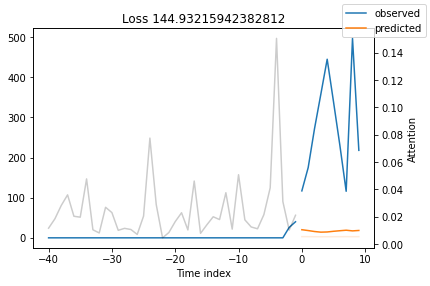

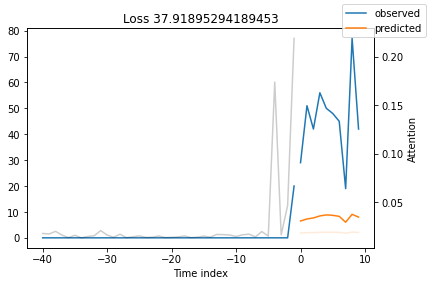

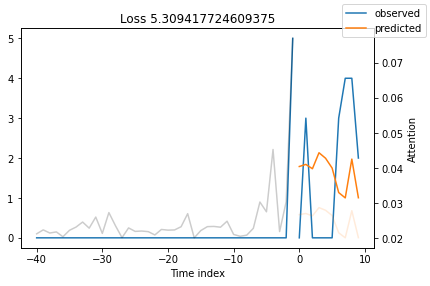

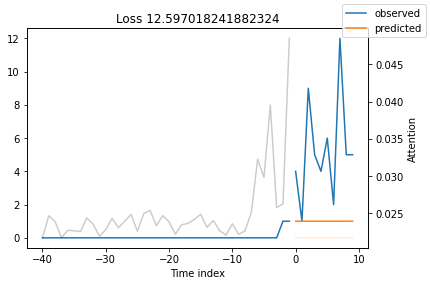

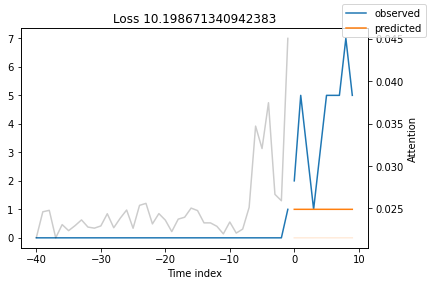

In [191]:
for idx in range(5):  # plot 10 examples
    best_tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True);

In [192]:
predictions, x = best_tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(x, predictions)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals);

In [ ]:
# calcualte root mean squared error on validation set
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
val_predictions = best_tft.predict(val_dataloader)

In [ ]:
criterion = nn.MSELoss()
torch.sqrt(criterion(actuals,val_predictions))

tensor(3.0038)

In [ ]:
for i in range(1):
    print(actuals[i],val_predictions[i])


tensor([117., 175., 272., 358., 445., 339., 231., 116., 497., 218.]) tensor([102.5515,  99.6919, 113.5085, 114.3063, 116.0230,  99.4663,  97.3996,
         39.5258, 100.2657,  89.8821])


In [ ]:
print('max_prediction_length:',max_prediction_length)
print('max_encoder_length   :',max_encoder_length)

max_prediction_length: 10
max_encoder_length   : 60


In [ ]:
# select last 30 days from data (max_encoder_length is 24)
encoder_data = df_train[lambda x: x.date_block_num > x.date_block_num.max() - max_encoder_length]

print(encoder_data['date_block_num'].min(),encoder_data['date_block_num'].max())
#print(encoder_data['DATE'].min(),encoder_data['DATE'].max())
encoder_data

0 49


,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Z_WEEK,Z_WEEK_DATE,Demanda,days_from_payday,average_sales_by_Z_MODELO,average_sales_by_Z_PUNTO_VENTA,average_sales_by_Z_GAMA,average_sales_by_Z_WEEK,average_sales_by_Z_WEEK_DATE,dayofweek,month,dayofyear,date_block_num
0,MOD_1,PVENT_1,GAM_1,SEMANA_01,2021-05-17,0.0,14,0.000000,10.754032,1.141352,0.752613,0.752613,0,5,137,0
1,MOD_1,PVENT_1,GAM_1,SEMANA_02,2021-05-24,0.0,7,0.000000,12.705645,1.191099,0.768575,0.768575,0,5,144,1
2,MOD_1,PVENT_1,GAM_1,SEMANA_03,2021-05-31,0.0,0,0.000000,12.774194,1.193264,0.790940,0.790940,0,5,151,2
3,MOD_1,PVENT_1,GAM_1,SEMANA_04,2021-06-07,0.0,8,0.000000,13.665323,1.214385,0.813474,0.813474,0,6,158,3
4,MOD_1,PVENT_1,GAM_1,SEMANA_05,2021-06-14,0.0,1,0.000000,11.870968,1.075487,0.818243,0.818243,0,6,165,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358645,MOD_99,PVENT_99,GAM_3,SEMANA_46,2022-03-28,0.0,3,2.228216,0.172131,0.726865,0.630975,0.630975,0,3,87,45
2358646,MOD_99,PVENT_99,GAM_3,SEMANA_47,2022-04-04,0.0,11,2.116183,0.081967,0.705165,0.567846,0.567846,0,4,94,46
2358647,MOD_99,PVENT_99,GAM_3,SEMANA_48,2022-04-11,1.0,4,1.112033,0.122951,0.386478,0.353783,0.353783,0,4,101,47
2358648,MOD_99,PVENT_99,GAM_3,SEMANA_49,2022-04-18,1.0,12,3.116183,0.155738,0.764527,0.647701,0.647701,0,4,108,48


In [ ]:
df_test

,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Z_WEEK,Z_WEEK_DATE,Demanda,days_from_payday,average_sales_by_Z_MODELO,average_sales_by_Z_PUNTO_VENTA,average_sales_by_Z_GAMA,average_sales_by_Z_WEEK,average_sales_by_Z_WEEK_DATE,dayofweek,month,dayofyear,date_block_num
0,MOD_1,PVENT_1,GAM_1,SEMANA_51,2022-05-02,0.0,13,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,50
1,MOD_1,PVENT_1,GAM_1,SEMANA_52,2022-05-09,0.0,6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,51
2,MOD_1,PVENT_1,GAM_1,SEMANA_53,2022-05-16,0.0,15,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,52
3,MOD_1,PVENT_1,GAM_1,SEMANA_54,2022-05-23,0.0,8,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,53
4,MOD_1,PVENT_1,GAM_1,SEMANA_55,2022-05-30,0.0,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471725,MOD_99,PVENT_99,GAM_3,SEMANA_56,2022-06-06,0.0,9,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,55
471726,MOD_99,PVENT_99,GAM_3,SEMANA_57,2022-06-13,0.0,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,56
471727,MOD_99,PVENT_99,GAM_3,SEMANA_58,2022-06-20,0.0,10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,57
471728,MOD_99,PVENT_99,GAM_3,SEMANA_59,2022-06-27,0.0,3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,58


In [ ]:
df_test

,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Z_WEEK,Z_WEEK_DATE,Demanda,days_from_payday,average_sales_by_Z_MODELO,average_sales_by_Z_PUNTO_VENTA,average_sales_by_Z_GAMA,average_sales_by_Z_WEEK,average_sales_by_Z_WEEK_DATE,dayofweek,month,dayofyear,date_block_num
0,MOD_1,PVENT_1,GAM_1,SEMANA_51,2022-05-02,0.0,13,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,50
1,MOD_1,PVENT_1,GAM_1,SEMANA_52,2022-05-09,0.0,6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,51
2,MOD_1,PVENT_1,GAM_1,SEMANA_53,2022-05-16,0.0,15,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,52
3,MOD_1,PVENT_1,GAM_1,SEMANA_54,2022-05-23,0.0,8,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,53
4,MOD_1,PVENT_1,GAM_1,SEMANA_55,2022-05-30,0.0,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471725,MOD_99,PVENT_99,GAM_3,SEMANA_56,2022-06-06,0.0,9,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,55
471726,MOD_99,PVENT_99,GAM_3,SEMANA_57,2022-06-13,0.0,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,56
471727,MOD_99,PVENT_99,GAM_3,SEMANA_58,2022-06-20,0.0,10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,57
471728,MOD_99,PVENT_99,GAM_3,SEMANA_59,2022-06-27,0.0,3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,58


In [ ]:
df_train.columns

Index(['Z_MODELO', 'Z_PUNTO_VENTA', 'Z_GAMA', 'Z_WEEK', 'Z_WEEK_DATE',
       'Demanda', 'days_from_payday', 'average_sales_by_Z_MODELO',
       'average_sales_by_Z_PUNTO_VENTA', 'average_sales_by_Z_GAMA',
       'average_sales_by_Z_WEEK', 'average_sales_by_Z_WEEK_DATE', 'dayofweek',
       'month', 'dayofyear', 'date_block_num'],
      dtype='object')

In [ ]:
max_prediction_length

10

In [ ]:

last_data = df_train[df_train['date_block_num'].isin([idx  -  max_prediction_length for idx in df_test['date_block_num'].unique()])]
last_data['date_block_num'] = last_data['date_block_num'] + max_prediction_length

decoder_data = pd.merge(df_test[[col for col in df_test.columns if 'Demanda' not in col]], 
        last_data[['date_block_num','Z_MODELO','Z_PUNTO_VENTA','Z_GAMA',"Demanda",
                   'average_sales_by_Z_MODELO','average_sales_by_Z_PUNTO_VENTA', 
                   'average_sales_by_Z_GAMA','average_sales_by_Z_WEEK', 'average_sales_by_Z_WEEK_DATE']],
        
        on = ['date_block_num', 'Z_MODELO','Z_PUNTO_VENTA','Z_GAMA',],
                        how='left'
        )


encoder_data.replace([np.inf, -np.inf, np.nan],0,inplace=True)
decoder_data.replace([np.inf, -np.inf, np.nan],0,inplace=True)


# combine encoder and decoder data
new_prediction_data = pd.concat([encoder_data, decoder_data], ignore_index=True)

In [ ]:
last_data[['date_block_num','Z_MODELO','Z_PUNTO_VENTA','Z_GAMA',"Demanda",
                   'average_sales_by_Z_MODELO','average_sales_by_Z_PUNTO_VENTA', 
                   'average_sales_by_Z_GAMA','average_sales_by_Z_WEEK', 'average_sales_by_Z_WEEK_DATE']]

,date_block_num,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Demanda,average_sales_by_Z_MODELO,average_sales_by_Z_PUNTO_VENTA,average_sales_by_Z_GAMA,average_sales_by_Z_WEEK,average_sales_by_Z_WEEK_DATE
40,50,MOD_1,PVENT_1,GAM_1,117.0,3.476091,10.842742,0.860043,0.687003,0.687003
41,51,MOD_1,PVENT_1,GAM_1,175.0,4.900208,9.705645,0.867789,0.676319,0.676319
42,52,MOD_1,PVENT_1,GAM_1,272.0,5.659044,11.233871,0.823767,0.651983,0.651983
43,53,MOD_1,PVENT_1,GAM_1,358.0,7.542620,10.548387,0.889969,0.745850,0.745850
44,54,MOD_1,PVENT_1,GAM_1,445.0,9.139293,11.032258,0.729276,0.650944,0.650944
...,...,...,...,...,...,...,...,...,...,...
2358645,55,MOD_99,PVENT_99,GAM_3,0.0,2.228216,0.172131,0.726865,0.630975,0.630975
2358646,56,MOD_99,PVENT_99,GAM_3,0.0,2.116183,0.081967,0.705165,0.567846,0.567846
2358647,57,MOD_99,PVENT_99,GAM_3,1.0,1.112033,0.122951,0.386478,0.353783,0.353783
2358648,58,MOD_99,PVENT_99,GAM_3,1.0,3.116183,0.155738,0.764527,0.647701,0.647701


In [ ]:
decoder_data['average_sales_by_Z_WEEK']

0         0.687003
1         0.676319
2         0.651983
3         0.745850
4         0.650944
            ...   
471725    0.630975
471726    0.567846
471727    0.353783
471728    0.647701
471729    0.598393
Name: average_sales_by_Z_WEEK, Length: 471730, dtype: float64

In [ ]:
encoder_data

,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Z_WEEK,Z_WEEK_DATE,Demanda,days_from_payday,average_sales_by_Z_MODELO,average_sales_by_Z_PUNTO_VENTA,average_sales_by_Z_GAMA,average_sales_by_Z_WEEK,average_sales_by_Z_WEEK_DATE,dayofweek,month,dayofyear,date_block_num
0,MOD_1,PVENT_1,GAM_1,SEMANA_01,2021-05-17,0.0,14,0.000000,10.754032,1.141352,0.752613,0.752613,0,5,137,0
1,MOD_1,PVENT_1,GAM_1,SEMANA_02,2021-05-24,0.0,7,0.000000,12.705645,1.191099,0.768575,0.768575,0,5,144,1
2,MOD_1,PVENT_1,GAM_1,SEMANA_03,2021-05-31,0.0,0,0.000000,12.774194,1.193264,0.790940,0.790940,0,5,151,2
3,MOD_1,PVENT_1,GAM_1,SEMANA_04,2021-06-07,0.0,8,0.000000,13.665323,1.214385,0.813474,0.813474,0,6,158,3
4,MOD_1,PVENT_1,GAM_1,SEMANA_05,2021-06-14,0.0,1,0.000000,11.870968,1.075487,0.818243,0.818243,0,6,165,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358645,MOD_99,PVENT_99,GAM_3,SEMANA_46,2022-03-28,0.0,3,2.228216,0.172131,0.726865,0.630975,0.630975,0,3,87,45
2358646,MOD_99,PVENT_99,GAM_3,SEMANA_47,2022-04-04,0.0,11,2.116183,0.081967,0.705165,0.567846,0.567846,0,4,94,46
2358647,MOD_99,PVENT_99,GAM_3,SEMANA_48,2022-04-11,1.0,4,1.112033,0.122951,0.386478,0.353783,0.353783,0,4,101,47
2358648,MOD_99,PVENT_99,GAM_3,SEMANA_49,2022-04-18,1.0,12,3.116183,0.155738,0.764527,0.647701,0.647701,0,4,108,48


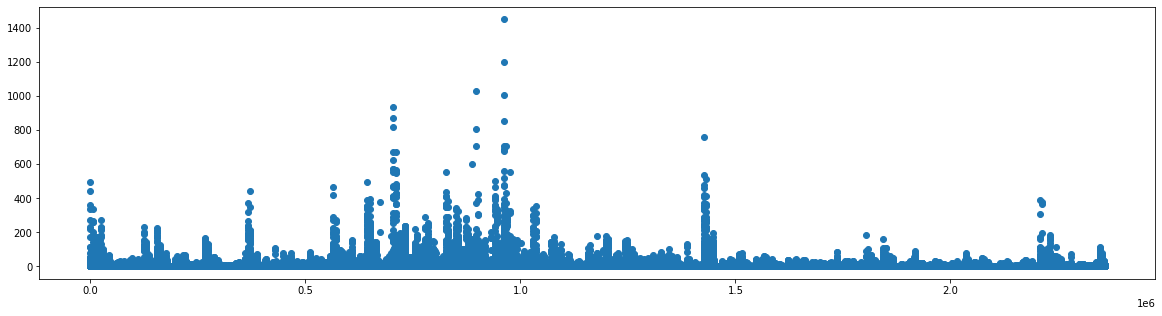

In [ ]:
import matplotlib.pyplot as plt

aux = encoder_data['Demanda'].values

fig = plt.figure(figsize=(20,5))
plt.plot(aux,'o')
plt.show()

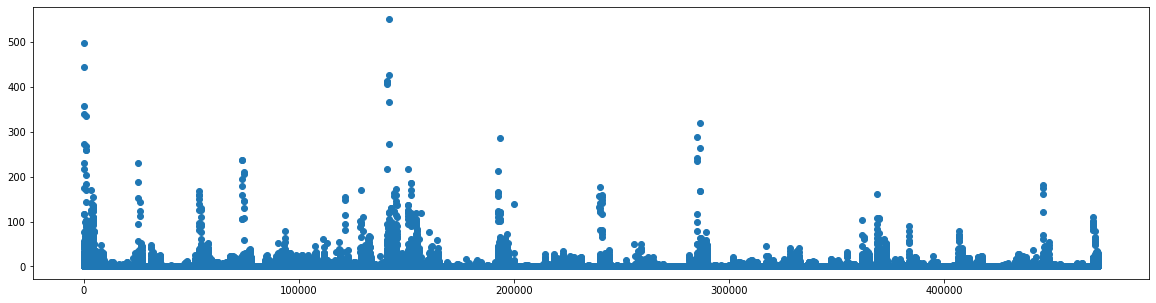

In [ ]:
import matplotlib.pyplot as plt

aux = decoder_data['Demanda'].values

fig = plt.figure(figsize=(20,5))
plt.plot(aux,'o')
plt.show()

In [ ]:
decoder_data

,date_block_num,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,dayofweek,month,dayofyear,days_from_payday,Demanda,average_sales_by_Z_MODELO,average_sales_by_Z_PUNTO_VENTA,average_sales_by_Z_GAMA,average_sales_by_Z_WEEK,average_sales_by_Z_WEEK_DATE
0,50,MOD_1,PVENT_1,GAM_1,0,5,122,13,117.0,3.476091,10.842742,0.860043,0.687003,0.687003
1,51,MOD_1,PVENT_1,GAM_1,0,5,129,6,175.0,4.900208,9.705645,0.867789,0.676319,0.676319
2,52,MOD_1,PVENT_1,GAM_1,0,5,136,15,272.0,5.659044,11.233871,0.823767,0.651983,0.651983
3,53,MOD_1,PVENT_1,GAM_1,0,5,143,8,358.0,7.542620,10.548387,0.889969,0.745850,0.745850
4,54,MOD_1,PVENT_1,GAM_1,0,5,150,1,445.0,9.139293,11.032258,0.729276,0.650944,0.650944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471725,55,MOD_99,PVENT_99,GAM_3,0,6,157,9,0.0,2.228216,0.172131,0.726865,0.630975,0.630975
471726,56,MOD_99,PVENT_99,GAM_3,0,6,164,2,0.0,2.116183,0.081967,0.705165,0.567846,0.567846
471727,57,MOD_99,PVENT_99,GAM_3,0,6,171,10,1.0,1.112033,0.122951,0.386478,0.353783,0.353783
471728,58,MOD_99,PVENT_99,GAM_3,0,6,178,3,1.0,3.116183,0.155738,0.764527,0.647701,0.647701


In [ ]:
new_prediction_data

,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Z_WEEK,Z_WEEK_DATE,Demanda,days_from_payday,average_sales_by_Z_MODELO,average_sales_by_Z_PUNTO_VENTA,average_sales_by_Z_GAMA,average_sales_by_Z_WEEK,average_sales_by_Z_WEEK_DATE,dayofweek,month,dayofyear,date_block_num
0,MOD_1,PVENT_1,GAM_1,SEMANA_01,2021-05-17,0.0,14,0.000000,10.754032,1.141352,0.752613,0.752613,0,5,137,0
1,MOD_1,PVENT_1,GAM_1,SEMANA_02,2021-05-24,0.0,7,0.000000,12.705645,1.191099,0.768575,0.768575,0,5,144,1
2,MOD_1,PVENT_1,GAM_1,SEMANA_03,2021-05-31,0.0,0,0.000000,12.774194,1.193264,0.790940,0.790940,0,5,151,2
3,MOD_1,PVENT_1,GAM_1,SEMANA_04,2021-06-07,0.0,8,0.000000,13.665323,1.214385,0.813474,0.813474,0,6,158,3
4,MOD_1,PVENT_1,GAM_1,SEMANA_05,2021-06-14,0.0,1,0.000000,11.870968,1.075487,0.818243,0.818243,0,6,165,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830375,MOD_99,PVENT_99,GAM_3,NaN,NaT,0.0,9,2.228216,0.172131,0.726865,0.630975,0.630975,0,6,157,55
2830376,MOD_99,PVENT_99,GAM_3,NaN,NaT,0.0,2,2.116183,0.081967,0.705165,0.567846,0.567846,0,6,164,56
2830377,MOD_99,PVENT_99,GAM_3,NaN,NaT,1.0,10,1.112033,0.122951,0.386478,0.353783,0.353783,0,6,171,57
2830378,MOD_99,PVENT_99,GAM_3,NaN,NaT,1.0,3,3.116183,0.155738,0.764527,0.647701,0.647701,0,6,178,58


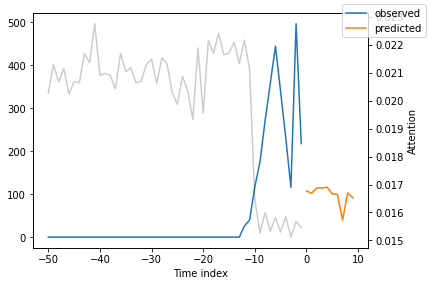

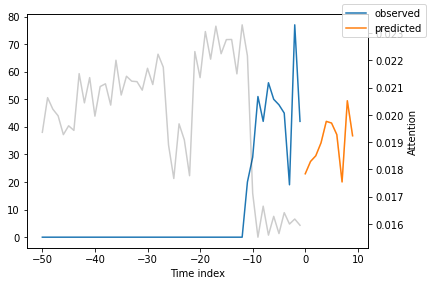

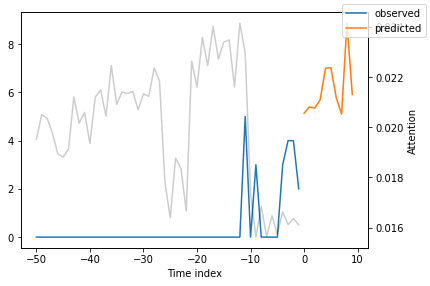

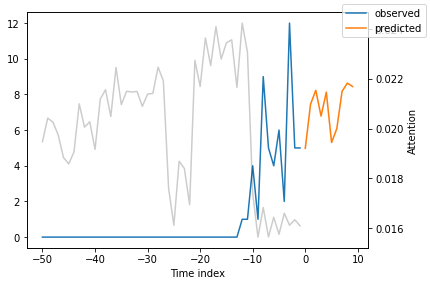

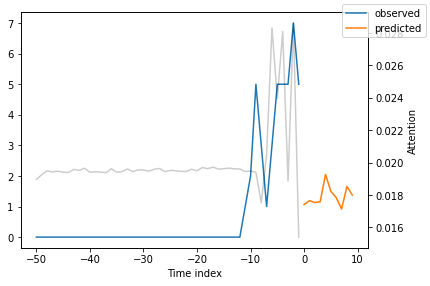

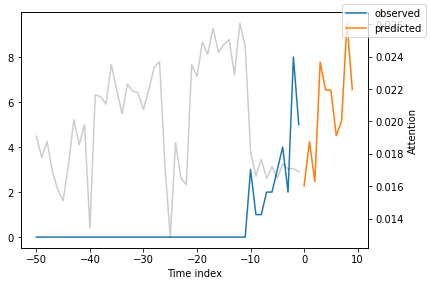

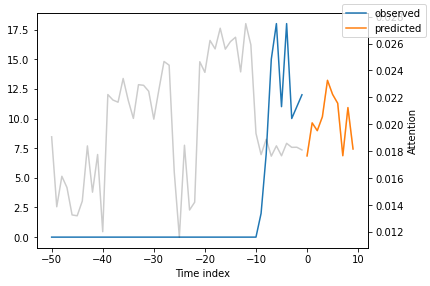

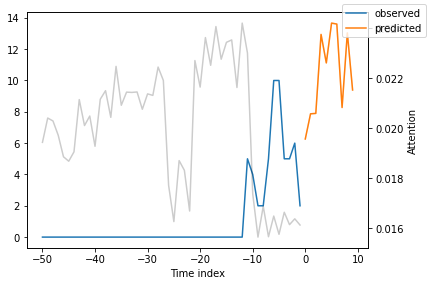

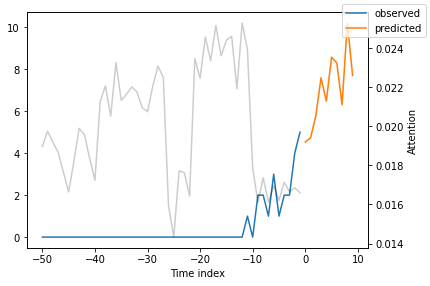

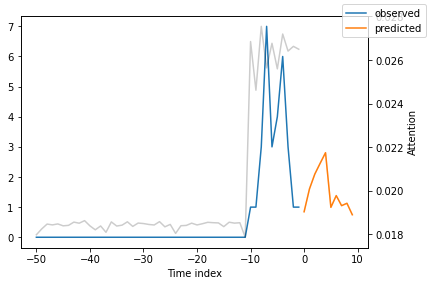

In [ ]:
new_raw_predictions, new_x = best_tft.predict(new_prediction_data, mode="raw", return_x=True)

for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(new_x, new_raw_predictions, idx=idx, show_future_observed=False);

In [ ]:
#new_raw_predictions.shape
#torch.Size([47173, 10])

In [ ]:
new_raw_predictions

Output(prediction=tensor([[[107.4508],
         [102.3310],
         [114.5659],
         ...,
         [ 39.8590],
         [102.8817],
         [ 91.8824]],

        [[ 22.9977],
         [ 27.4536],
         [ 29.5183],
         ...,
         [ 20.0312],
         [ 49.4778],
         [ 36.7769]],

        [[  5.1406],
         [  5.3962],
         [  5.3499],
         ...,
         [  5.1003],
         [  8.8750],
         [  5.9153]],

        ...,

        [[  0.7755],
         [  0.7350],
         [  0.6008],
         ...,
         [  0.4582],
         [  0.8023],
         [  0.7757]],

        [[  0.5651],
         [  0.6303],
         [  0.6224],
         ...,
         [  0.3799],
         [  0.6772],
         [  0.6413]],

        [[  0.4184],
         [  0.3789],
         [  0.3226],
         ...,
         [  0.1382],
         [  0.2824],
         [  0.4007]]]), encoder_attention=tensor([[[[0.0198, 0.0200, 0.0189,  ..., 0.0175, 0.0187, 0.0183],
          [0.0204, 0.0218, 0.02

{'attention': <Figure size 432x288 with 1 Axes>,
 'static_variables': <Figure size 504x252 with 1 Axes>,
 'encoder_variables': <Figure size 504x324 with 1 Axes>,
 'decoder_variables': <Figure size 504x234 with 1 Axes>}

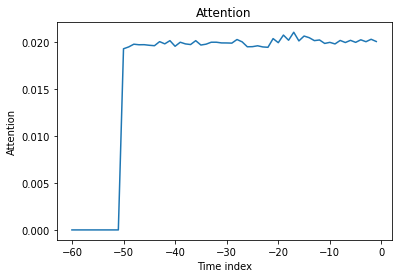

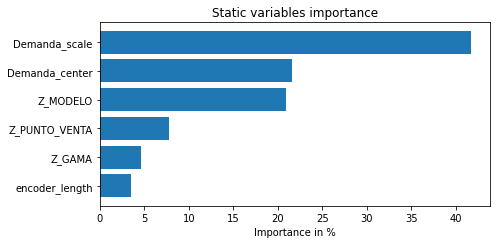

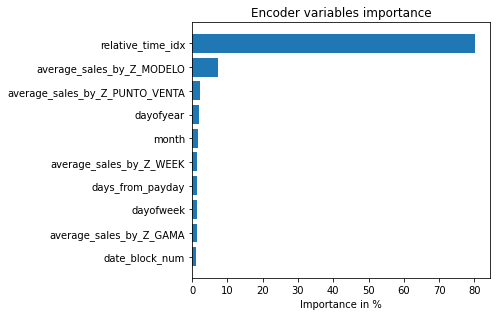

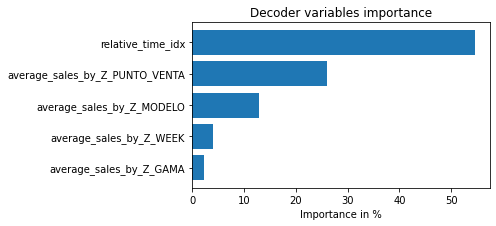

In [ ]:
interpretation = best_tft.interpret_output(new_raw_predictions, reduction="sum")
best_tft.plot_interpretation(interpretation)

In [ ]:
df_test.head()

,date_block_num,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Demanda,dayofweek,month,dayofyear,days_from_payday
0,50,MOD_1,PVENT_1,GAM_1,0.0,0,5,122,13
1,51,MOD_1,PVENT_1,GAM_1,0.0,0,5,129,6
2,52,MOD_1,PVENT_1,GAM_1,0.0,0,5,136,15
3,53,MOD_1,PVENT_1,GAM_1,0.0,0,5,143,8
4,54,MOD_1,PVENT_1,GAM_1,0.0,0,5,150,1


In [ ]:
new_raw_predictions = best_tft.predict(new_prediction_data, mode="prediction", return_x=False)


In [ ]:
predictions = pd.DataFrame(new_raw_predictions.numpy()).T
predictions['date_block_num'] = sorted(df_test['date_block_num'].unique())
predictions = pd.melt(predictions, id_vars=['date_block_num'])
predictions = predictions.sort_values(['date_block_num', 'variable']).reset_index(drop=True)
df_test[['date_block_num','Z_MODELO','Z_PUNTO_VENTA','Z_GAMA']].sort_values(['date_block_num', 'Z_MODELO','Z_PUNTO_VENTA','Z_GAMA']).reset_index(drop=True)
df_test2 = df_test.join(predictions['value'])

In [ ]:
df_test2.head()

,date_block_num,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Demanda,dayofweek,month,dayofyear,days_from_payday,value
0,50,MOD_1,PVENT_1,GAM_1,0.0,0,5,122,13,107.450821
1,51,MOD_1,PVENT_1,GAM_1,0.0,0,5,129,6,22.997671
2,52,MOD_1,PVENT_1,GAM_1,0.0,0,5,136,15,5.140582
3,53,MOD_1,PVENT_1,GAM_1,0.0,0,5,143,8,4.976296
4,54,MOD_1,PVENT_1,GAM_1,0.0,0,5,150,1,1.063097


In [ ]:
import pickle

reverse_mapping_file = '../../utils/reverse_dict_mapping_list.txt'

with open(reverse_mapping_file, 'rb') as f:
    reverse_mapping = pickle.load( f)

In [ ]:
#reverse_mapping#

In [ ]:
#descriptive_columns = ['Z_MODELO','Z_PUNTO_VENTA','Z_GAMA']
descriptive_columns = ['Z_MARCA', 'Z_GAMA', 'Z_MODELO',
                       'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA']
i=0
for column in descriptive_columns:
    if column in df_test2.columns:
        df_test2[column] = df_test2[column].map(reverse_mapping[i])
    i+=1

In [ ]:
df_test2.head()

,date_block_num,Z_MODELO,Z_PUNTO_VENTA,Z_GAMA,Demanda,dayofweek,month,dayofyear,days_from_payday,value
0,50,b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101...,da45328ba820604eb99694768f2a430cd933d161601dcb...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,0.0,0,5,122,13,107.450821
1,51,b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101...,da45328ba820604eb99694768f2a430cd933d161601dcb...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,0.0,0,5,129,6,22.997671
2,52,b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101...,da45328ba820604eb99694768f2a430cd933d161601dcb...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,0.0,0,5,136,15,5.140582
3,53,b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101...,da45328ba820604eb99694768f2a430cd933d161601dcb...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,0.0,0,5,143,8,4.976296
4,54,b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101...,da45328ba820604eb99694768f2a430cd933d161601dcb...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,0.0,0,5,150,1,1.063097


In [ ]:

inv_dict_dates = {v: k for k, v in dict_dates.items()}
df_test2['Z_WEEK'] = df_test2['date_block_num'].map(inv_dict_dates)

In [ ]:
df_test2['ID'] = df_test2['Z_MODELO'] + '|' + df_test2['Z_PUNTO_VENTA'] + '|' + df_test2['Z_GAMA'] + '|' + df_test2['Z_WEEK']

In [ ]:
df_test2['Demanda'] = df_test2['value']
submission = df_test2[['ID','Demanda']]#.groupby('ID').sum().reset_index()

In [ ]:
submission

,ID,Demanda
0,b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101...,107.450821
1,b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101...,22.997671
2,b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101...,5.140582
3,b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101...,4.976296
4,b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101...,1.063097
...,...,...
471725,3524d14b77a5f69283fe54411abb43fe6ec50045fe07da...,0.656378
471726,3524d14b77a5f69283fe54411abb43fe6ec50045fe07da...,0.592491
471727,3524d14b77a5f69283fe54411abb43fe6ec50045fe07da...,0.775711
471728,3524d14b77a5f69283fe54411abb43fe6ec50045fe07da...,0.641323


In [ ]:
#submission['Demanda'] = 0.9#submission['value']

submission[['ID', 'Demanda']].to_csv('../../results/Submission_tft_v2_.csv', index = False, sep = ',')

<AxesSubplot:>

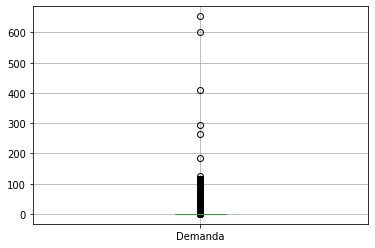

In [ ]:
submission.boxplot(['Demanda'])

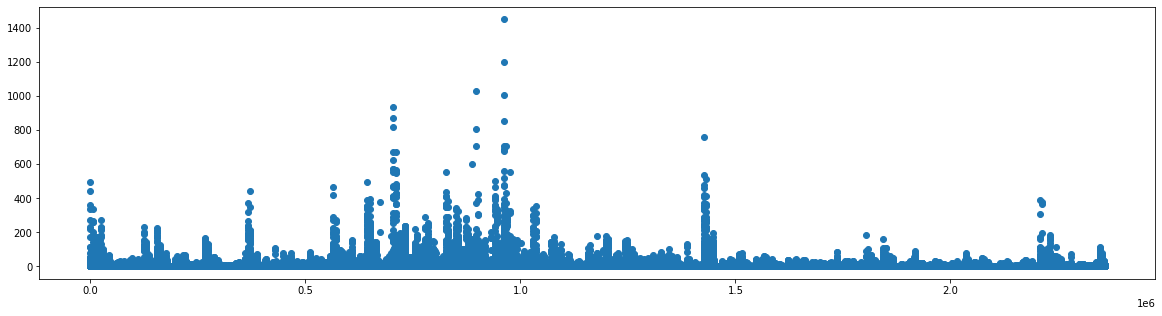

In [ ]:
import matplotlib.pyplot as plt

aux = df_train['Demanda'].values

fig = plt.figure(figsize=(20,5))
plt.plot(aux,'o')
plt.show()

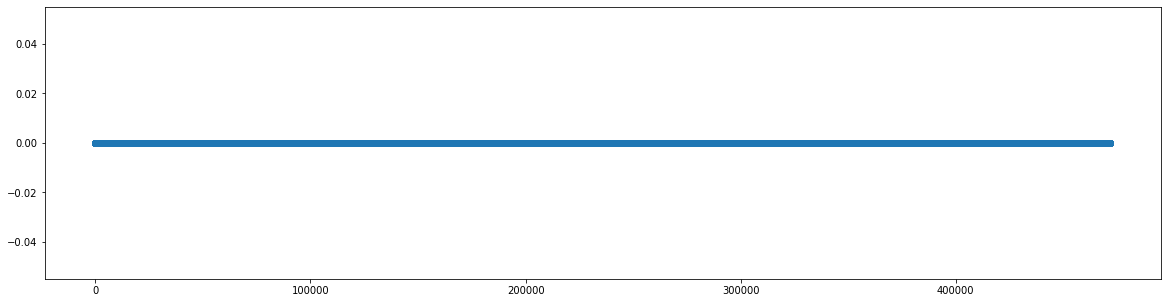

In [ ]:
import matplotlib.pyplot as plt

aux = df_test['Demanda'].values

fig = plt.figure(figsize=(20,5))
plt.plot(aux,'o')
plt.show()

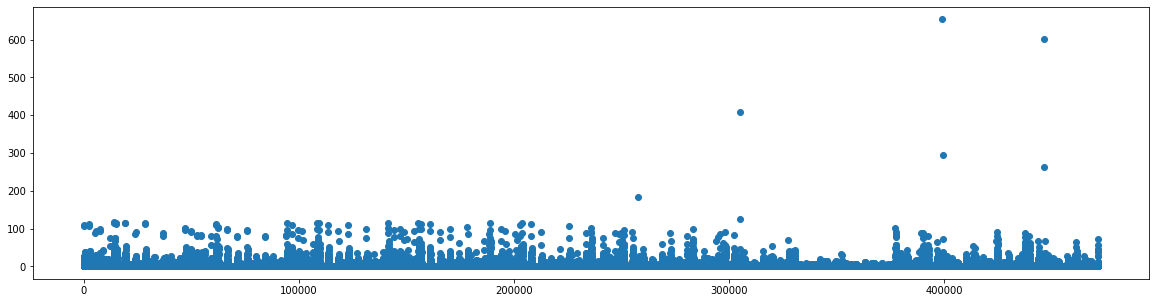

In [ ]:
import matplotlib.pyplot as plt

aux = submission['Demanda'].values

fig = plt.figure(figsize=(20,5))
plt.plot(aux,'o')
plt.show()

In [ ]:
aux[aux>=300]

array([408.19968, 653.47485, 601.7613 ], dtype=float32)

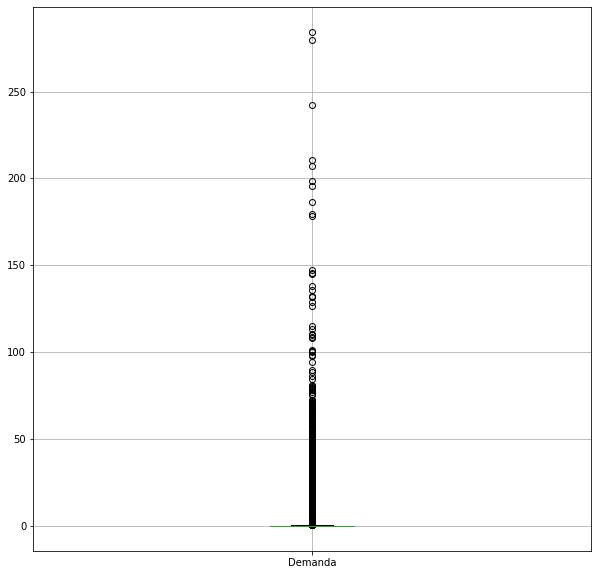

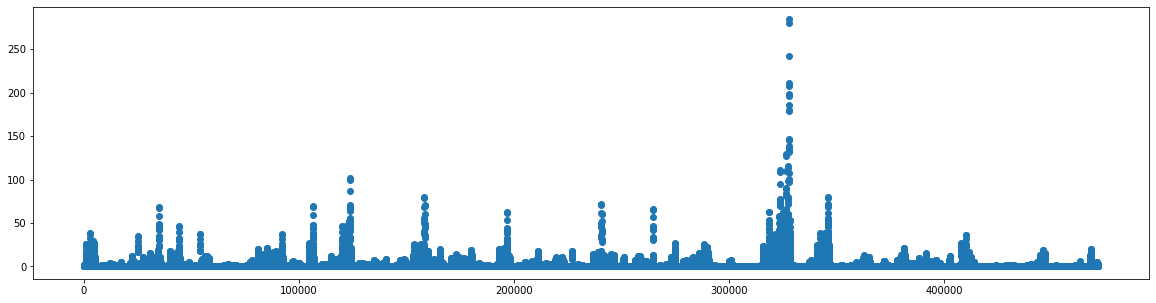

In [ ]:
df_baseline = pd.read_csv('../../results/Submission_28.csv')
import matplotlib.pyplot as plt

aux = df_baseline['Demanda']

fig = plt.figure(figsize=(10,10))

df_baseline.boxplot(['Demanda'])


fig = plt.figure(figsize=(20,5))
plt.plot(aux,'o')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_actual = df_baseline['Demanda']
y_predicted = submission['Demanda'].values

rms = mean_squared_error(y_actual, y_predicted, squared=False)
rms

3.927250661921238